# Unsupervised Analysis of Days of Week

Treating crossings each day as features to learn about the relationships between various days.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from sklearn.mixture import GaussianMixture

C:\Users\jinskeep\AppData\Local\Temp\1\ipykernel_9680\2672137541.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Get Data

In [2]:
from jupyterwf.data import get_fremont_data
data = get_fremont_data()

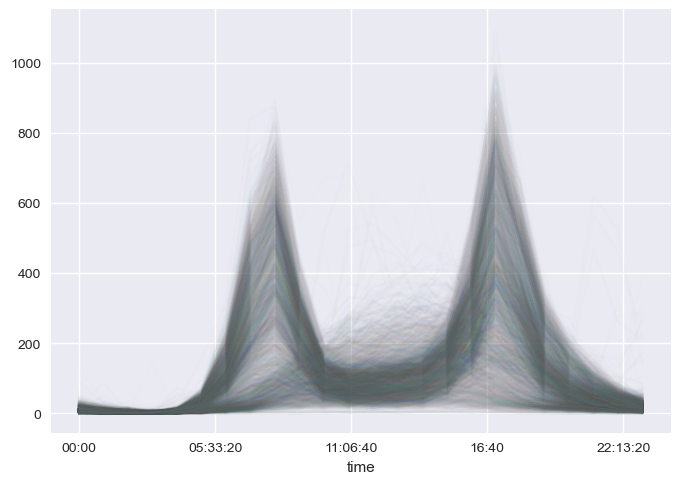

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01);

## Principle Component Analysis 

In [4]:
pivoted.shape

(24, 3650)

In [5]:
X = pivoted.fillna(0).T.values
X.shape

(3650, 24)

In [6]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(3650, 2)

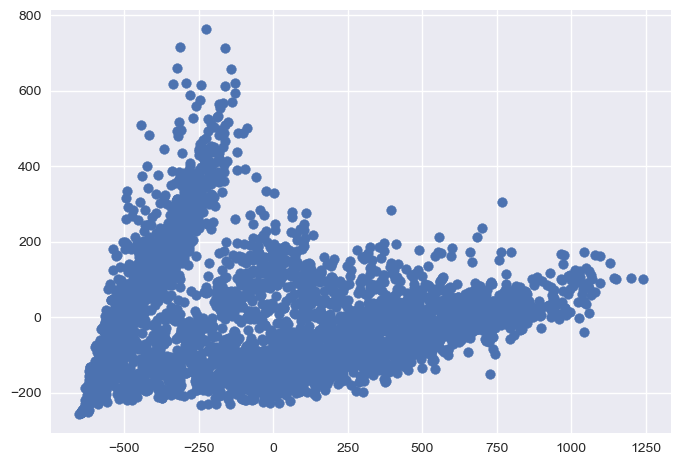

In [7]:
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsupervised Clustering

In [8]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

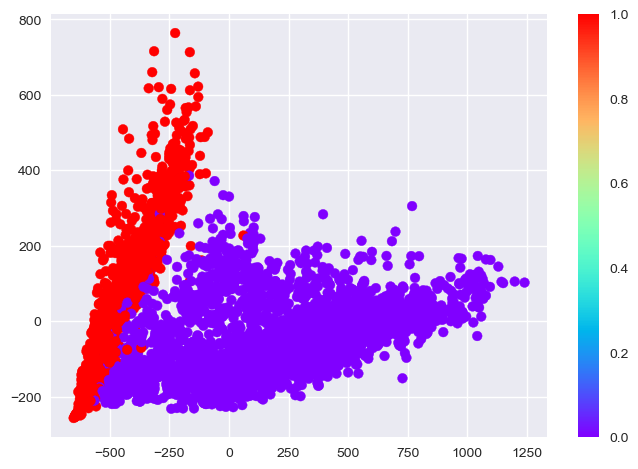

In [9]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar()

<AxesSubplot: xlabel='time'>

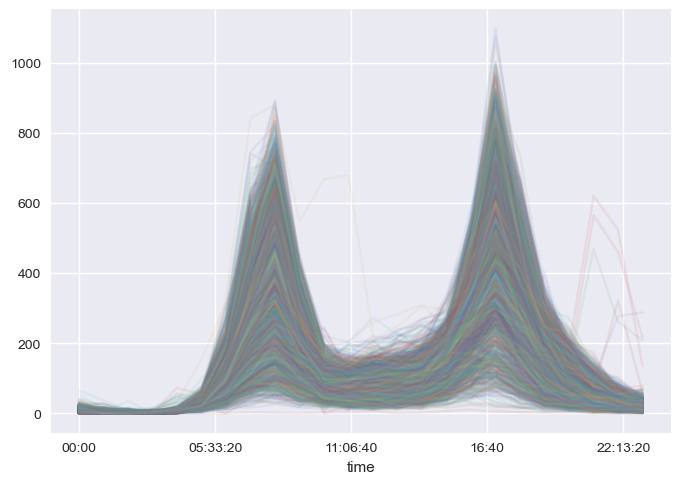

In [10]:
pivoted.T[labels==0].T.plot(legend=False, alpha=0.1)

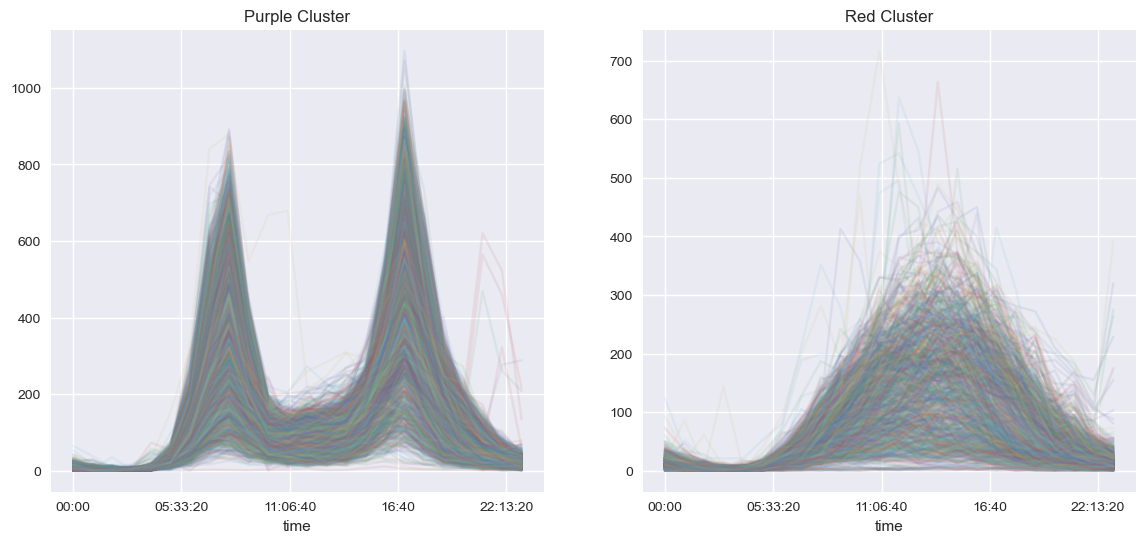

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

pivoted.T[labels==0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels==1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with day of week

In [12]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

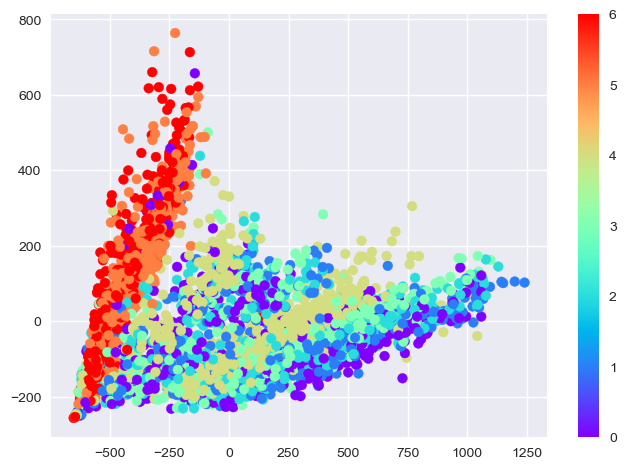

In [13]:
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();


## Analyzing Outliers 

The following points are weekdays with a holiday-like pattern.

In [14]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 0) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', length=2513, freq=None)